In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb

from utils import *

In [3]:
CH = 23
device = torch.device('cuda')
val_dates = ['180330','180331']
test_dates = ['180328','180329']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/Goose_ANN_models/'
model_name = 'MLP_1_ch'


train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128,CH=CH)

In [4]:
len(train_loader), len(val_loader), len(test_loader)

(446, 49, 21)

In [8]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180413, rec:002, time:280.0, label:0.0


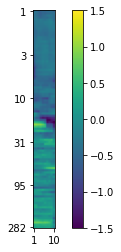

date:180327, rec:008, time:2592.0, label:0.0


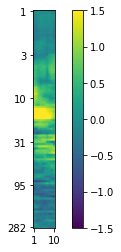

date:180401, rec:001, time:910.0, label:0.0


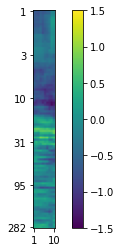

date:180409, rec:006, time:5198.0, label:0.0


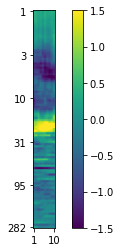

date:180325, rec:006, time:3453.0, label:1.0
date:180401, rec:001, time:2229.0, label:1.0
date:180327, rec:004, time:5204.0, label:1.0
date:180414, rec:007, time:4948.0, label:0.0


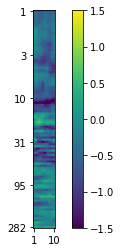

date:180413, rec:001, time:700.0, label:0.0


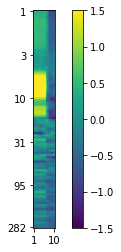

date:180414, rec:003, time:3730.0, label:1.0
date:180327, rec:007, time:3790.0, label:0.0


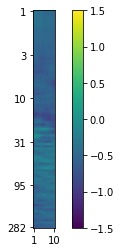

date:180412, rec:006, time:5448.0, label:0.0


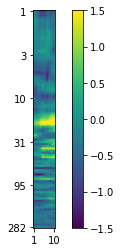

date:180414, rec:002, time:4051.0, label:1.0
date:180324, rec:003, time:3327.0, label:1.0
date:180410, rec:003, time:2049.0, label:1.0
date:180325, rec:007, time:3528.0, label:1.0
date:180327, rec:001, time:3272.0, label:1.0
date:180324, rec:008, time:5494.0, label:0.0


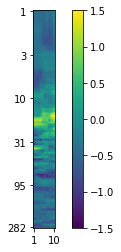

date:180410, rec:004, time:1328.0, label:1.0
date:180411, rec:006, time:3048.0, label:1.0
date:180409, rec:006, time:853.0, label:1.0
date:180412, rec:006, time:4828.0, label:0.0


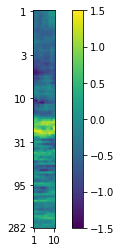

date:180411, rec:006, time:671.0, label:1.0
date:180324, rec:005, time:1930.0, label:1.0
date:180325, rec:003, time:3783.0, label:1.0
date:180324, rec:008, time:5774.0, label:0.0


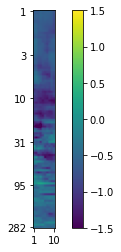

date:180410, rec:002, time:1857.0, label:1.0
date:180410, rec:002, time:3364.0, label:0.0


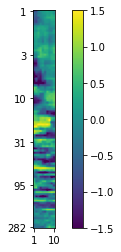

date:180409, rec:003, time:2183.0, label:1.0
date:180413, rec:001, time:3030.0, label:0.0


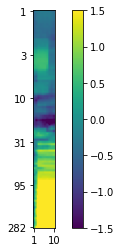

date:180413, rec:008, time:3098.0, label:1.0
date:180412, rec:006, time:4538.0, label:0.0


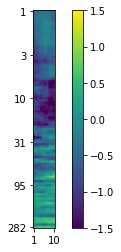

date:180409, rec:005, time:5199.0, label:0.0


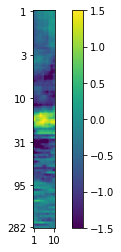

date:180412, rec:006, time:5248.0, label:0.0


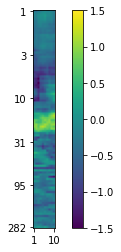

date:180324, rec:003, time:6248.0, label:1.0
date:180324, rec:003, time:3347.0, label:1.0
date:180325, rec:009, time:4749.0, label:0.0


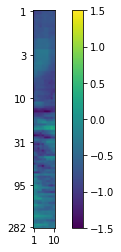

date:180327, rec:002, time:2160.0, label:1.0
date:180411, rec:005, time:500.0, label:1.0
date:180413, rec:003, time:7041.0, label:0.0


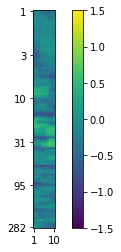

date:180413, rec:004, time:1866.0, label:1.0
date:180413, rec:003, time:6651.0, label:0.0


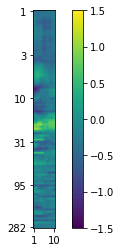

date:180327, rec:001, time:20.0, label:0.0


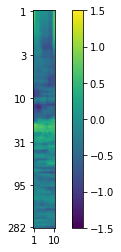

date:180413, rec:002, time:1140.0, label:0.0


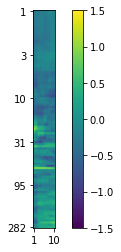

date:180414, rec:004, time:6205.0, label:1.0
date:180414, rec:002, time:3341.0, label:1.0
date:180413, rec:001, time:6967.0, label:0.0


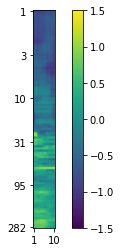

date:180401, rec:001, time:340.0, label:0.0


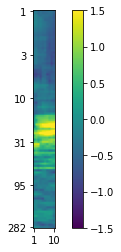

date:180413, rec:002, time:4871.0, label:0.0


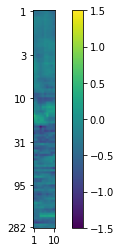

date:180327, rec:001, time:1940.0, label:0.0


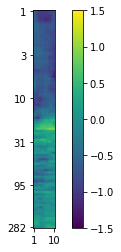

date:180324, rec:001, time:5191.0, label:1.0
date:180401, rec:001, time:920.0, label:0.0


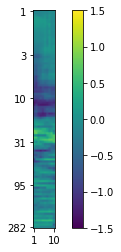

date:180326, rec:003, time:7030.0, label:1.0
date:180412, rec:002, time:5754.0, label:1.0
date:180323, rec:002, time:280.0, label:1.0
date:180413, rec:002, time:1840.0, label:0.0


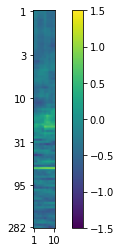

date:180326, rec:003, time:3109.0, label:1.0
date:180409, rec:006, time:6928.0, label:0.0


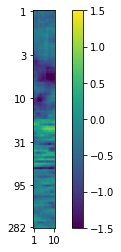

date:180410, rec:006, time:1069.0, label:1.0
date:180413, rec:001, time:6127.0, label:0.0


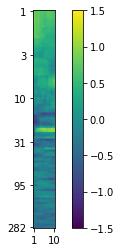

date:180412, rec:006, time:3818.0, label:0.0


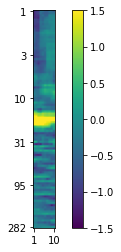

date:180412, rec:006, time:510.0, label:1.0
date:180324, rec:001, time:580.0, label:0.0


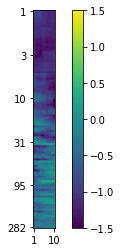

date:180413, rec:008, time:1372.0, label:1.0
date:180413, rec:004, time:6622.0, label:1.0
date:180412, rec:001, time:6453.0, label:1.0
date:180411, rec:002, time:1040.0, label:1.0
date:180412, rec:003, time:30.0, label:1.0
date:180413, rec:002, time:780.0, label:0.0


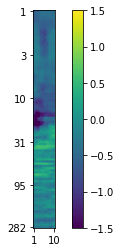

date:180401, rec:001, time:1200.0, label:0.0


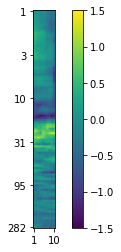

date:180413, rec:002, time:4051.0, label:0.0


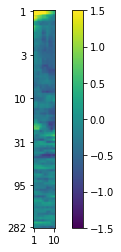

date:180401, rec:001, time:7123.0, label:1.0
date:180409, rec:006, time:3285.0, label:0.0


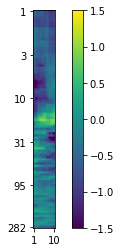

date:180325, rec:007, time:5713.0, label:0.0


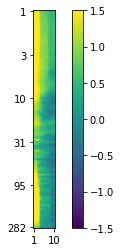

date:180413, rec:008, time:7068.0, label:1.0
date:180412, rec:001, time:1620.0, label:1.0
date:180413, rec:003, time:5861.0, label:0.0


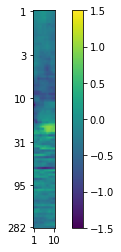

date:180411, rec:004, time:578.0, label:1.0
date:180325, rec:007, time:5903.0, label:0.0


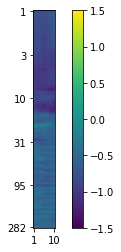

date:180411, rec:007, time:1110.0, label:0.0


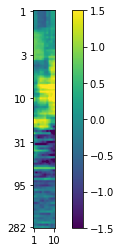

date:180325, rec:007, time:1454.0, label:1.0
date:180325, rec:007, time:2966.0, label:0.0


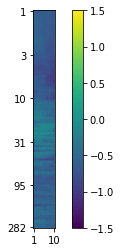

date:180327, rec:002, time:1960.0, label:1.0
date:180412, rec:006, time:4208.0, label:0.0


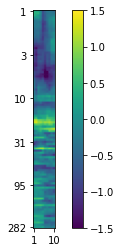

date:180413, rec:004, time:3240.0, label:0.0


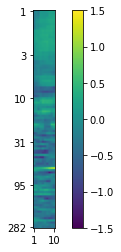

date:180324, rec:001, time:5839.0, label:1.0
date:180410, rec:005, time:4742.0, label:1.0
date:180324, rec:003, time:5198.0, label:1.0
date:180413, rec:005, time:4359.0, label:1.0
date:180325, rec:005, time:1004.0, label:1.0
date:180327, rec:008, time:2012.0, label:0.0


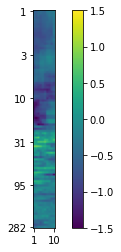

date:180323, rec:001, time:1090.0, label:0.0


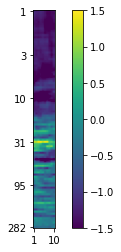

date:180413, rec:003, time:5068.0, label:0.0


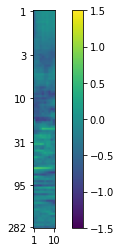

date:180325, rec:005, time:4316.0, label:0.0


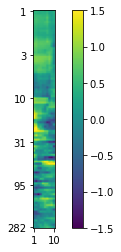

date:180323, rec:001, time:930.0, label:0.0


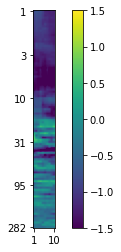

date:180324, rec:008, time:5334.0, label:0.0


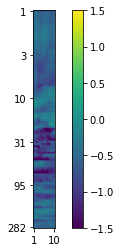

date:180324, rec:009, time:550.0, label:0.0


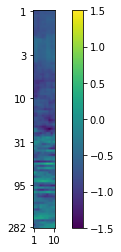

date:180410, rec:004, time:6922.0, label:1.0
date:180327, rec:007, time:6741.0, label:0.0


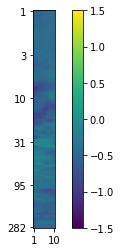

date:180324, rec:003, time:3647.0, label:1.0
date:180327, rec:006, time:4568.0, label:1.0
date:180413, rec:002, time:4901.0, label:0.0


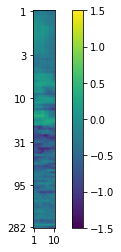

date:180413, rec:003, time:4485.0, label:1.0
date:180327, rec:002, time:4243.0, label:1.0
date:180324, rec:001, time:2211.0, label:1.0
date:180325, rec:009, time:3036.0, label:1.0
date:180325, rec:002, time:3919.0, label:0.0


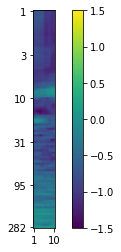

date:180413, rec:002, time:1600.0, label:0.0


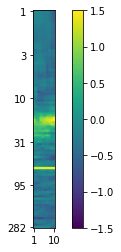

date:180327, rec:008, time:3032.0, label:0.0


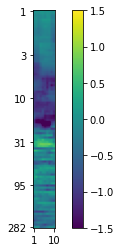

date:180413, rec:002, time:7091.0, label:0.0


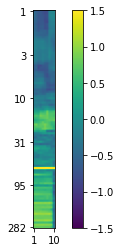

date:180413, rec:001, time:1900.0, label:0.0


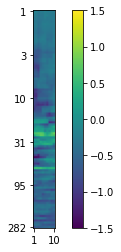

date:180323, rec:003, time:380.0, label:1.0
date:180410, rec:005, time:5537.0, label:1.0
date:180409, rec:006, time:4628.0, label:0.0


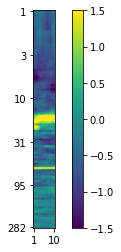

date:180323, rec:003, time:2140.0, label:1.0
date:180409, rec:003, time:6967.0, label:1.0
date:180410, rec:003, time:4488.0, label:1.0
date:180322, rec:003, time:6576.0, label:1.0
date:180327, rec:002, time:6815.0, label:1.0
date:180411, rec:007, time:1000.0, label:0.0


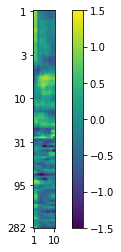

date:180414, rec:004, time:430.0, label:1.0
date:180324, rec:008, time:1711.0, label:0.0


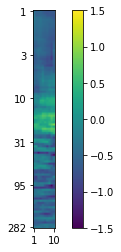

date:180324, rec:004, time:4169.0, label:1.0
date:180325, rec:007, time:4873.0, label:0.0


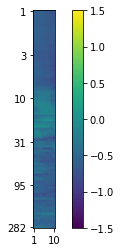

date:180413, rec:003, time:390.0, label:0.0


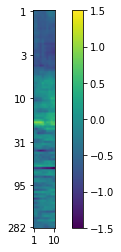

date:180327, rec:001, time:6952.0, label:0.0


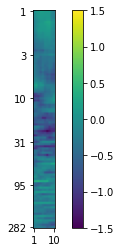

date:180412, rec:003, time:4326.0, label:1.0
date:180411, rec:002, time:2785.0, label:1.0


In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [6]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [3]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
input_dim = 1*10*100
embed_dim = 256
p = 0.


model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = p).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model

NameError: name 'MLP' is not defined

In [8]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output = model(data)
output.shape

torch.Size([128, 1, 1])

In [9]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                  reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                 reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, epoch,model_name))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.3280967175960541
Val loss for epoch 0: 0.34564268589019775
Train loss for epoch 1: 0.22909754514694214
Val loss for epoch 1: 0.31126272678375244
1
Train loss for epoch 2: 0.1832876056432724
Val loss for epoch 2: 0.30037280917167664
2
Train loss for epoch 3: 0.15905019640922546
Val loss for epoch 3: 0.3273947834968567
Train loss for epoch 4: 0.1442601978778839
Val loss for epoch 4: 0.3090626299381256
Train loss for epoch 5: 0.126137837767601
Val loss for epoch 5: 0.3175754249095917
Train loss for epoch 6: 0.11932548135519028
Val loss for epoch 6: 0.4739963114261627
Train loss for epoch 7: 0.10333505272865295
Val loss for epoch 7: 0.3277727961540222
Train loss for epoch 8: 0.09817217290401459
Val loss for epoch 8: 0.39355263113975525
Train loss for epoch 9: 0.08926506340503693
Val loss for epoch 9: 0.374157577753067
Train loss for epoch 10: 0.09639190137386322
Val loss for epoch 10: 0.4075247347354889
Train loss for epoch 11: 0.07398015260696411
Val loss for epo

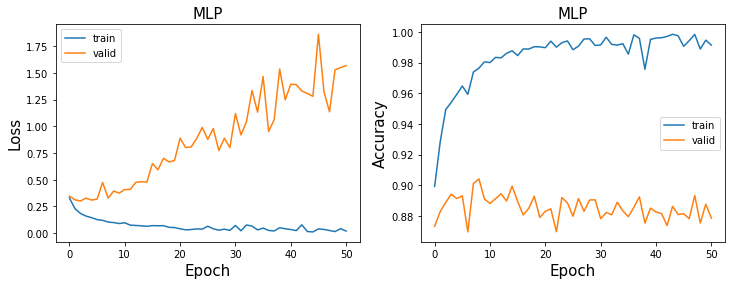

In [12]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # embed_dim=64

In [13]:
model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, best_epoch,model_name)))

<All keys matched successfully>

In [15]:
w1 = model.linear1.weight.view(256,10,100)
w2 = model.linear2.weight
print(w1.shape, w2.shape)
w1 = w1.detach().cpu().numpy()
w2 = w2.detach().cpu().numpy()
w1[0].shape
type(w1)

torch.Size([256, 10, 100]) torch.Size([1, 256])


numpy.ndarray

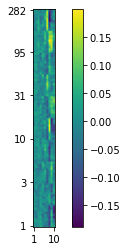

In [16]:
plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
plt.xticks(ticks=[0, 9], labels=[1, 10])
plt.imshow(w1[1].transpose(),origin='lower')
# plt.clim(-1.5, 1.5)
plt.colorbar()
plt.show()

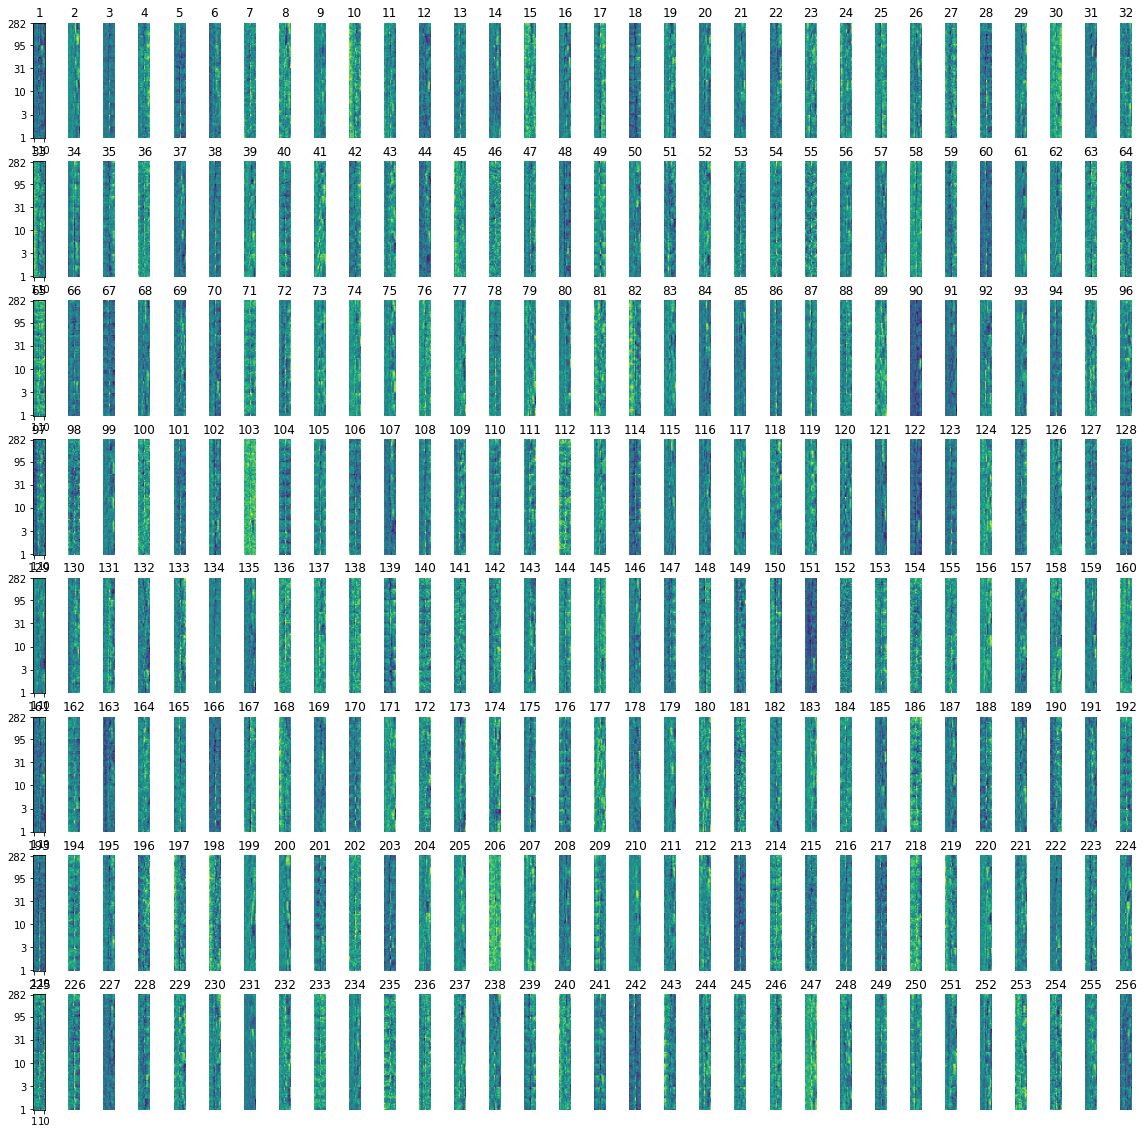

In [17]:
timewindow = 10
plt.figure(figsize=(20,20))
ylabels_list = [0,32,64,96,128,160,192,224,256] 
for i in range(256):
    weights_sub = w1[i]
    plt.subplot(8,32,i+1)
    if i in ylabels_list:
        plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
        plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
    else:
        plt.axis('off')
#     plt.imshow(weights_sub)
    plt.imshow(w1[i].transpose(),origin='lower')
    plt.title(str(i+1))
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.1577414572238922 accuracy:0.9456066945606695


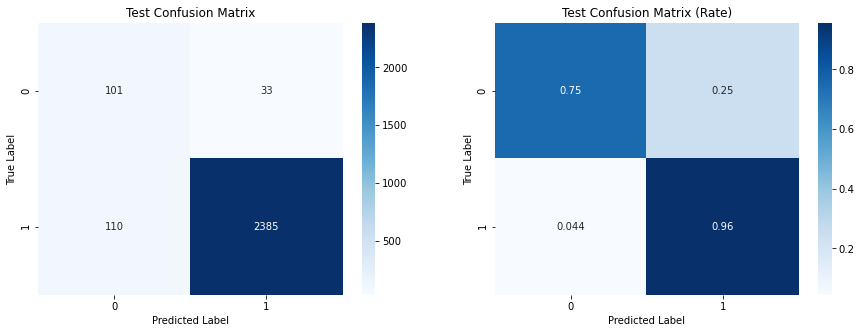

In [19]:
plot_confusion(test_preds, test_labels)